# Exploratory Data Analysis
Reference: https://www.kaggle.com/kabure/extensive-eda-and-modeling-xgb-hyperopt/notebook


- The data is broken into two files identity and transaction, which are joined by TransactionID.
    - Note: Not all transactions have corresponding identity information.
    
- The TransactionDT feature is a timedelta from a given reference datetime (not an actual timestamp).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as ply
%matplotlib inline

# Read Dataset

In [2]:
df_id = pd.read_csv('./datasets/train_identity.csv')

In [4]:
df_train = pd.read_csv('./datasets/train_transaction.csv')

In [5]:
df_id.shape

(144233, 41)

In [6]:
df_train.shape

(590540, 394)

In [7]:
df_id.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [8]:
df_train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
df_train.iloc[:5, 5:17]

,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain
0,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN
1,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN
2,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN
3,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN
4,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN


# Check The Null cell

In [9]:
df_train['isFraud'].isnull().any()

False

In [11]:
nan_train = df_train.isnull().any()

In [13]:
nan_train.head(10)

TransactionID     False
isFraud           False
TransactionDT     False
TransactionAmt    False
ProductCD         False
card1             False
card2              True
card3              True
card4              True
card5              True
dtype: bool

In [14]:
nan_train.tail(10)

V330    True
V331    True
V332    True
V333    True
V334    True
V335    True
V336    True
V337    True
V338    True
V339    True
dtype: bool

# Check Class Imbalance

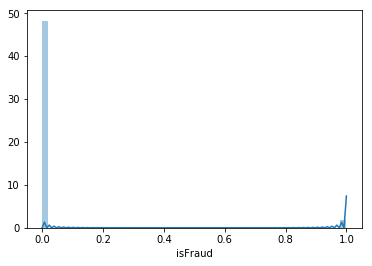

In [15]:
sns.distplot(df_train['isFraud'])

In [23]:
df_train.groupby('isFraud').count().iloc[:, 0]

isFraud
0    569877
1     20663
Name: TransactionID, dtype: int64

### Observation
The fraud/non-fraud ratio = 20,663 / 569,877 = 0.0362 = 3.62%.

The fraud ratio is pretty high.

# TransactionAmt of train dataset

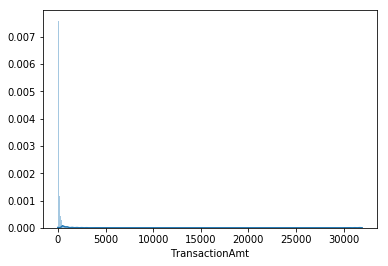

In [25]:
sns.distplot(df_train['TransactionAmt'], bins=500)

### Observation:
It's interesting that the TransactionAmt could greater than 1,000.

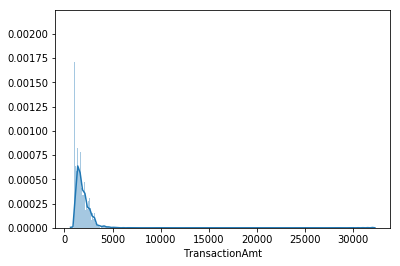

In [27]:
sns.distplot(df_train[df_train['TransactionAmt']>1000]['TransactionAmt'], bins=500)

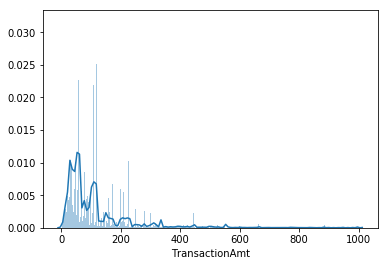

In [28]:
sns.distplot(df_train[df_train['TransactionAmt']<1000]['TransactionAmt'], bins=500)

Text(0.5, 1.0, 'Log Plot')

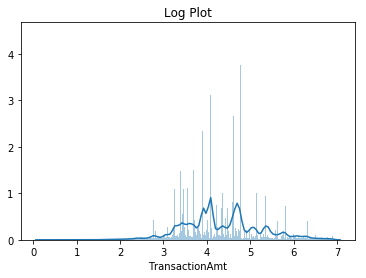

In [31]:
ax = sns.distplot(np.log1p(df_train[df_train['TransactionAmt']<1000]['TransactionAmt']), bins=500)
ax.set_title('Log Plot')

# Pair Plot of isFraud and TransactionAmt

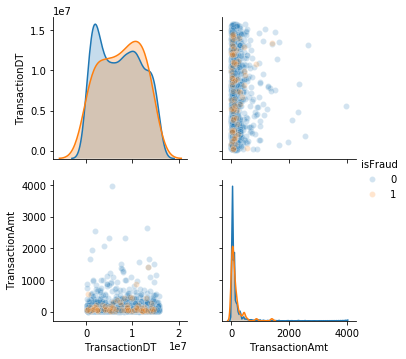

In [42]:
sns.pairplot(data=df_train.sample(2000, random_state=0),
            hue='isFraud',
            vars=['TransactionDT', 'TransactionAmt'],
            plot_kws={'alpha':0.2})

# Check the distribution of TransactionDT

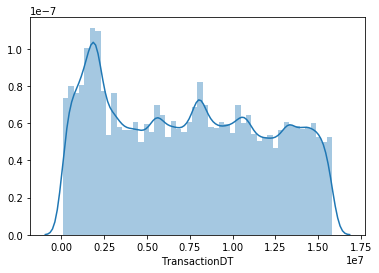

In [32]:
sns.distplot(df_train['TransactionDT'])

Text(0.5, 1.0, 'Log of TransactionDT')

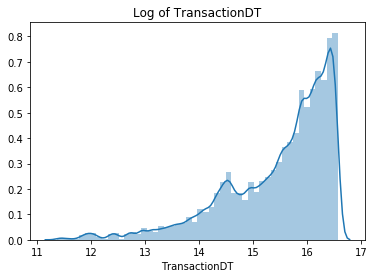

In [35]:
ax = sns.distplot(np.log1p(df_train['TransactionDT']))
ax.set_title('Log of TransactionDT')

# Product Feature

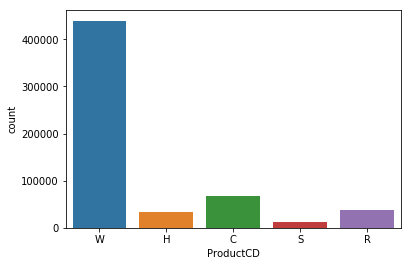

In [44]:
sns.countplot(data=df_train,
             x='ProductCD')

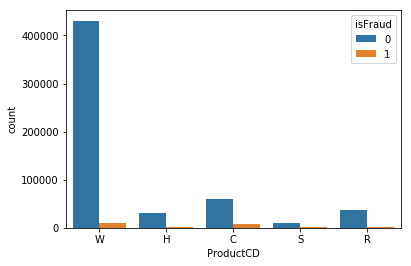

In [45]:
sns.countplot(data=df_train,
             x='ProductCD',
             hue='isFraud')

# Observation
W has lower fraud rate

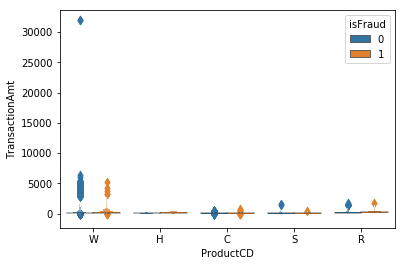

In [53]:
sns.boxenplot(data=df_train,
           x='ProductCD',
           y='TransactionAmt',
           hue='isFraud')

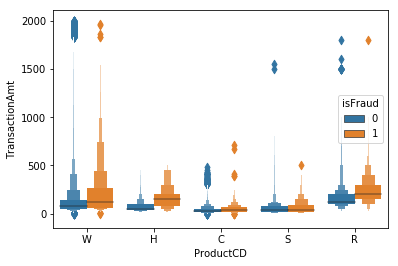

In [52]:
sns.boxenplot(data=df_train[df_train['TransactionAmt']<2000],
           x='ProductCD',
           y='TransactionAmt',
           hue='isFraud')

### Observation
The W, H, and R have higher fraud value.

# Card Features

In [62]:
df_train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
df_train.iloc[:5, 5:11]

,card1,card2,card3,card4,card5,card6
0,13926,NaN,150.0,discover,142.0,credit
1,2755,404.0,150.0,mastercard,102.0,credit
2,4663,490.0,150.0,visa,166.0,debit
3,18132,567.0,150.0,mastercard,117.0,debit
4,4497,514.0,150.0,mastercard,102.0,credit


### Count the number of Missing Cells

In [68]:
df_train[['card1', 'card2', 'card3','card4', 'card5', 'card6']].isnull().sum()

card1       0
card2    8933
card3    1565
card4    1577
card5    4259
card6    1571
dtype: int64

# Count Unique Values

In [70]:
df_train[['card1', 'card2', 'card3','card4', 'card5', 'card6']].nunique()

card1    13553
card2      500
card3      114
card4        4
card5      119
card6        4
dtype: int64